# Violação da desigualdade de Bell com swap

- Objetivo: Criar um estado de Bell e swapar o estado que está emaranhado



## Porta Swap 
| Comportamento       | Sem $\text{swap}$ (emaranhamento em 0 e 1) | Com $\text{swap}$ (emaranhamento em 0 e 4) |
|----------------------------|--------------------------------------------------|--------------------------------------------------|
| Estado quântico            | Idêntico, exceto pela posição dos qubits        | Idêntico, exceto pela posição dos qubits        |
| Medição do qubit 0         | Aleatória: $0$ ou $1$                           | Aleatória: $0$ ou $1$                           |
| Medição do parceiro        | Qubit $1$ colapsa com $0$                       | Qubit $4$ colapsa com $0$                       |
| Importância prática        | Útil se os qubits 0 e 1 estiverem conectados    | Útil para "mover" o entrelaçamento até o qubit 4 |


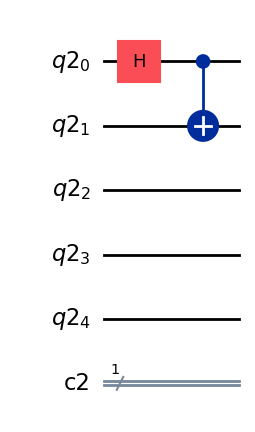

In [5]:
from qiskit import *

# Registradores
qubits = QuantumRegister(5)
measure_base = ClassicalRegister(1)  # Apenas um bit clássico
bell = QuantumCircuit(qubits, measure_base)

# Criação do estado de Bell entre qubits 0 e 4
bell.h(qubits[0])
bell.cx(qubits[0], qubits[1])

bell.draw("mpl")


#### Estado do Circuito

$$
\ket{\Phi^{+}} = \frac{1}{\sqrt{2}} \cdot ({\ket{00}+\ket{11}})
$$

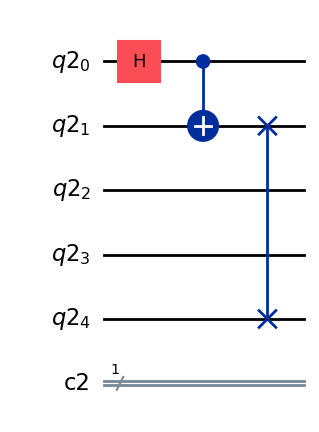

In [6]:
bell.swap(qubits[1], qubits[4])

bell.draw("mpl")

#### O novo estado depois da aplicação do swap

Agora você trocou o conteúdo dos qubits 1 e 4. O emaranhamento foi movido para os qubits 0 e 4. Ou seja:

$$
\ket{\Phi^{+}} = \frac{1}{\sqrt{2}} \cdot ({\ket{00}+\ket{11}})_{(0,4)}
$$

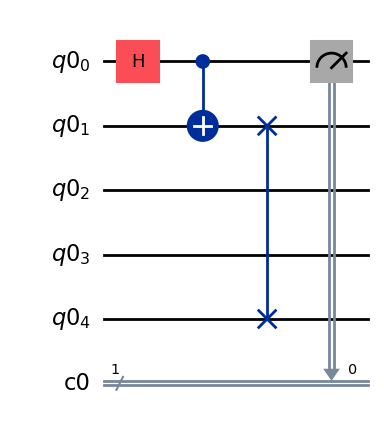

In [2]:
# Medição apenas do qubit 0
bell.measure(qubits[0], measure_base[0])
bell.draw("mpl")

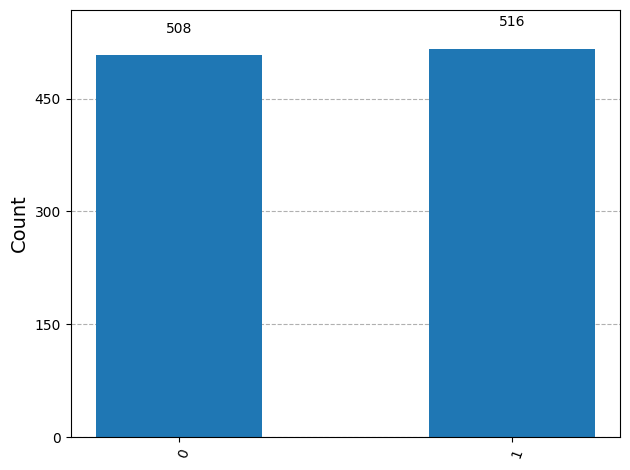

In [36]:
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator

sim = AerSimulator()
result = sim.run(bell, shots=1024).result()
counts = result.get_counts()

plot_histogram(counts)

#### Conclusão: 

- Então não há diferença conceitual no estado Bell final — ele continua sendo um estado Bell. Mas há diferença prática dependendo de qual par de qubits você quer emaranhar, por exemplo, para teleportar, fazer medida Bell ou conectar dispositivos físicos.



